In [3]:
!pip install kaggle numpy pandas torch matplotlib torchvision --quiet --upgrade


In [6]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [15]:
train_df = pd.read_csv('./data/train.csv', index_col ='Id')
test_df = pd.read_csv('./data/test.csv' , index_col ='Id')

In [16]:
print(train_df.shape , test_df.shape)

(1460, 80) (1459, 79)


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [22]:
object_df = train_df.dtypes
object_col = object_df[train_df.dtypes.values == 'object']
object_col

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [23]:
train_df1 = train_df.drop(object_col.index , axis=1)
test_df1 = train_df.drop(object_col.index , axis=1)
print(train_df1.shape , test_df1.shape)

(1460, 37) (1460, 37)


In [27]:
train_df1 =train_df1.fillna(train_df1.mean())
test_df1 = test_df1.fillna(test_df1.mean())

In [28]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [32]:
inputs = train_df1.drop('SalePrice' , axis=1)
targets = train_df1.SalePrice

print(train_df1.shape , test_df1.shape)

(1460, 37) (1460, 37)


# Loading The Data in Batches

In [54]:
input_size = 36
output_size =1

batch_size = 200

In [55]:
dataset = TensorDataset(torch.tensor(inputs.values , dtype= torch.float32) , torch.tensor(targets.values, dtype=torch.float32))
train_ds , val_ds = random_split(dataset , [1160 , 300])

train_dl = DataLoader(train_ds , batch_size , shuffle=True)
val_dl = DataLoader(val_ds , 2*batch_size)

# Base Model

In [56]:
class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.smooth_l1_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.smooth_l1_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    

In [57]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [58]:
model = HousingModel()

In [59]:
result = evaluate(model , val_dl)
result

/var/folders/xx/g7pprv0n0g5833wbpqw883x00000gn/T/ipykernel_84865/1718182107.py:19: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(out, targets)    # Calculate loss


{'val_loss': 178265.765625}

In [61]:
lr = 1e-3
history = fit(8, lr, model, train_dl, val_dl)

Epoch [0], val_loss: 68861.2109
Epoch [1], val_loss: 64479.3555
Epoch [2], val_loss: 59929.9570
Epoch [3], val_loss: 57114.4023
Epoch [4], val_loss: 58983.4023
Epoch [5], val_loss: 55705.6016
Epoch [6], val_loss: 54247.7383
Epoch [7], val_loss: 53860.6250


/var/folders/xx/g7pprv0n0g5833wbpqw883x00000gn/T/ipykernel_84865/1718182107.py:13: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(out, targets)    # Calculate loss
/var/folders/xx/g7pprv0n0g5833wbpqw883x00000gn/T/ipykernel_84865/1718182107.py:13: UserWarning: Using a target size (torch.Size([160])) that is different to the input size (torch.Size([160, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(out, targets)    # Calculate loss
/var/folders/xx/g7pprv0n0g5833wbpqw883x00000gn/T/ipykernel_84865/1718182107.py:19: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they hav

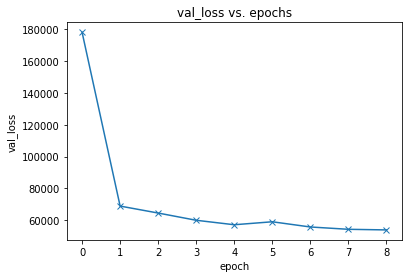

In [62]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [63]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [64]:
x, target = val_ds[20]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([6.0000e+01, 6.5000e+01, 7.1530e+03, 6.0000e+00, 5.0000e+00, 1.9920e+03,
        1.9920e+03, 0.0000e+00, 3.8700e+02, 0.0000e+00, 3.7400e+02, 7.6100e+02,
        8.1000e+02, 7.9300e+02, 0.0000e+00, 1.6030e+03, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 7.0000e+00, 0.0000e+00,
        1.9920e+03, 2.0000e+00, 4.8400e+02, 0.0000e+00, 1.2400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00, 2.0060e+03])
Target:  175900.0
Prediction: 151123.515625


In [83]:
test_ds = torch.tensor(test_df1.values , dtype= torch.float32)

In [84]:
pred = model(test_ds)
pred = pred.detach().numpy().astype('int64').reshape(-1)
submission = pd.DataFrame({'Id': test_df1.index.values, 'SalePrice': pred})
submission.to_csv('submission.csv', index=False)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1460x37 and 36x1)

In [86]:
test_df1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])